### Importing Libraries

In [2]:
pip install --upgrade "pandas<2.0"


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade tensorflow scikit-learn  plotly matplotlib numpy


  Using cached numpy-2.2.4-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, precision_recall_curve

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

### Reading the CSV file and checking for missing values, data types, and data descripton of the dataset

In [2]:
data = pd.read_csv("transaction_anomalies_dataset.csv")
data.head()

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,6:00,36,Male,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,1:00,41,Female,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,8:00,56,Female,649457,Savings


In [3]:
data.isnull().sum()

Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [5]:
data.describe()

,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Age,Income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1038.122511,2.498000,1000.682506,12.078000,15.341000,40.641000,8.948238e+05
std,283.580055,1.115006,20.632334,4.245225,8.361258,13.819953,3.453562e+05
min,849.024392,1.000000,939.081423,5.000000,1.000000,18.000000,3.001590e+05
25%,966.028796,1.000000,986.800556,8.000000,8.000000,29.000000,5.917308e+05
50%,1002.118678,3.000000,1000.501903,12.000000,16.000000,41.000000,8.876645e+05
75%,1033.143657,3.000000,1015.155595,16.000000,22.000000,53.000000,1.178102e+06
max,3227.459108,4.000000,1073.154036,19.000000,29.000000,64.000000,1.499670e+06


### Visualizing various charts to get insights from the Data (Histogram, Boxplot, Scatterplot, Barchart, Heatmap)

In [8]:
# Distribution of Transaction (Histogram)
dist_transaction = px.histogram(data, x = 'Transaction_Amount', 
                                nbins = 20, title = 'Distribution of Transaction Amount')
dist_transaction.update_layout(width = 1000, height = 600, xaxis_title = 'Transaction Amount', 
                               yaxis_title = 'Frequency')
dist_transaction.show()

![VISUALIZATION1](Visualizations/viz1.png)

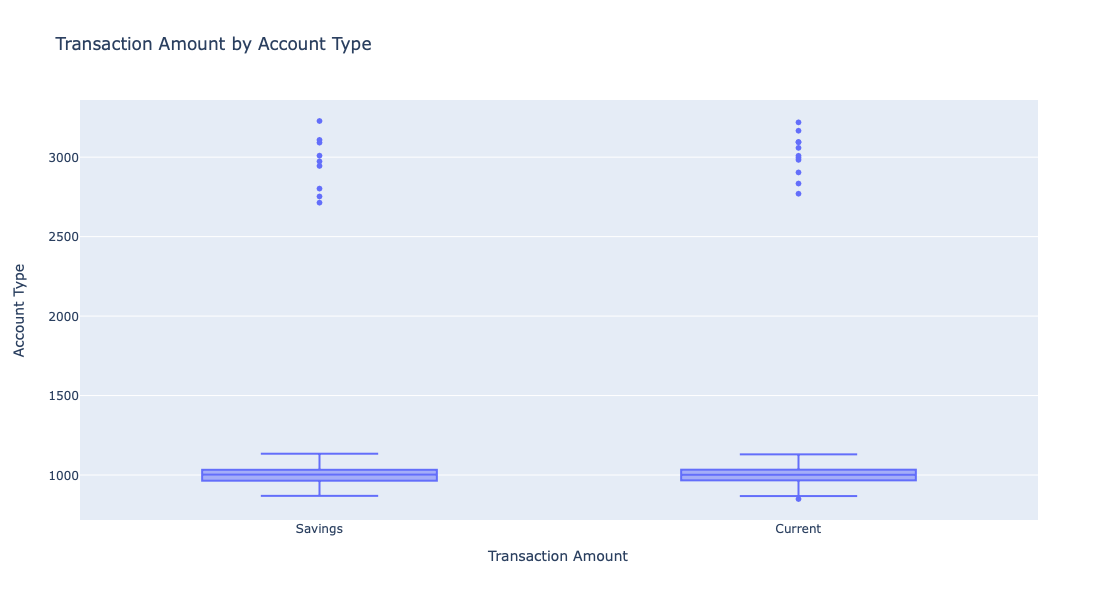

In [7]:
# Transaction Amount by Account type (Box plot)
transaction_acc_type = px.box(data, x = 'Account_Type', y = 'Transaction_Amount', title = 'Transaction Amount by Account Type')
transaction_acc_type.update_layout(width = 1000, height = 600, xaxis_title = 'Transaction Amount', yaxis_title = 'Account Type')
transaction_acc_type.show()

![VISUALIZATION2](Visualizations/viz2.png)

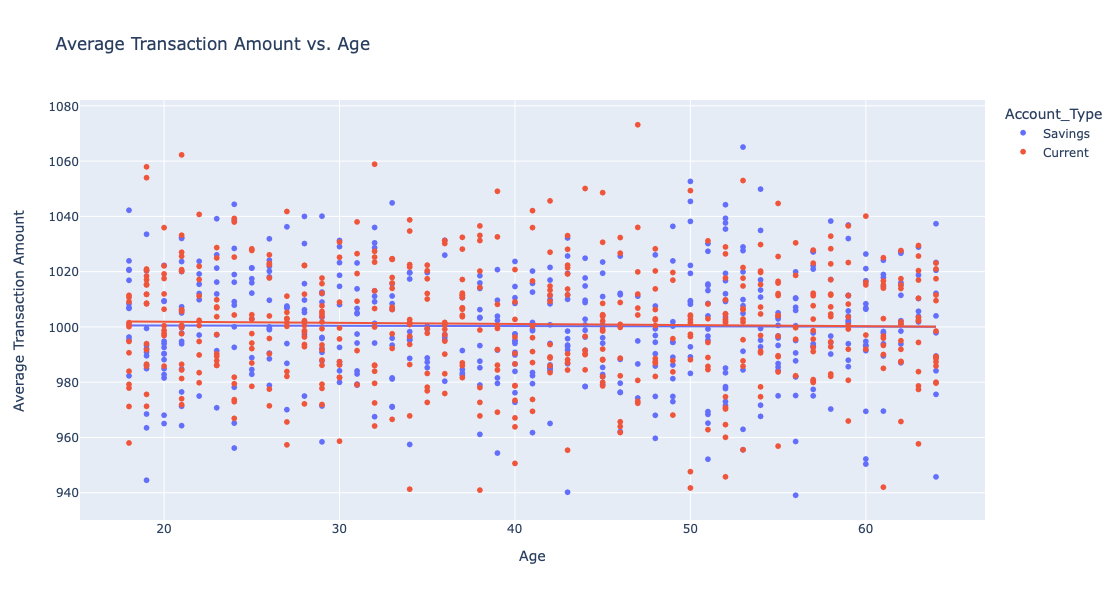

In [8]:
# Average transaction amount vs. age (Scatter plot)
avg_amount_age = px.scatter(data, x = 'Age', y = 'Average_Transaction_Amount', color = 'Account_Type',
                            title = 'Average Transaction Amount vs. Age', trendline = 'ols')
avg_amount_age.update_layout(width = 1000, height = 600, yaxis_title = 'Average Transaction Amount', xaxis_title = 'Age')
avg_amount_age.show()

![VISUALIZATION3](Visualizations/viz3.png)

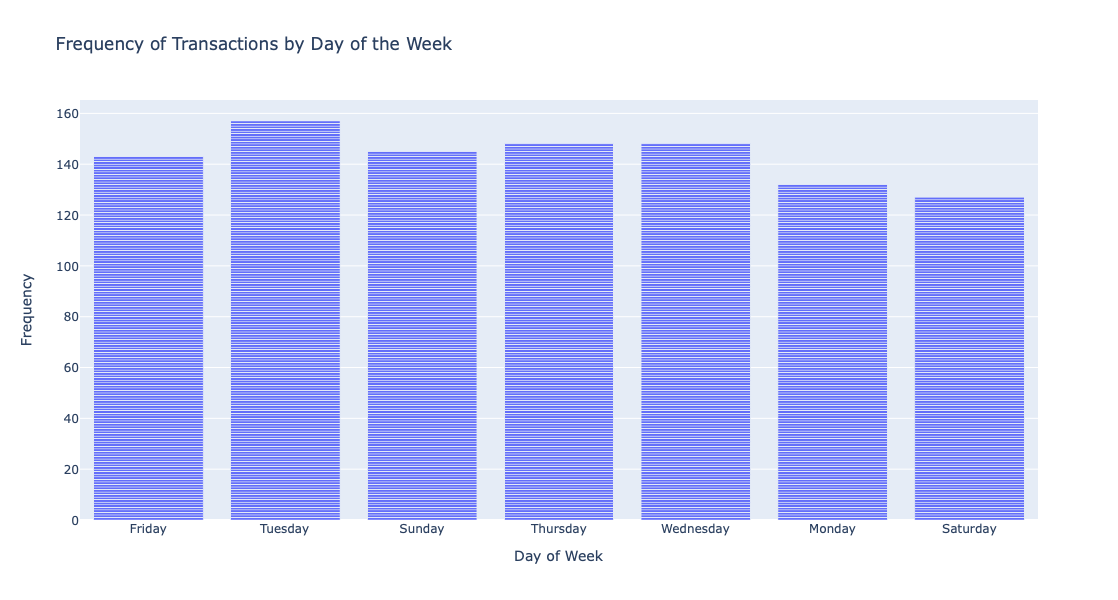

In [9]:
# Count of Transaction by Day of the Week (Bar chart)
day_of_week = px.bar(data, x = 'Day_of_Week', title = 'Frequency of Transactions by Day of the Week')
day_of_week.update_layout(width = 1000, height = 600, yaxis_title = 'Frequency', xaxis_title = 'Day of Week')
day_of_week.show()

![VISUALIZATION4](Visualizations/viz4.png)

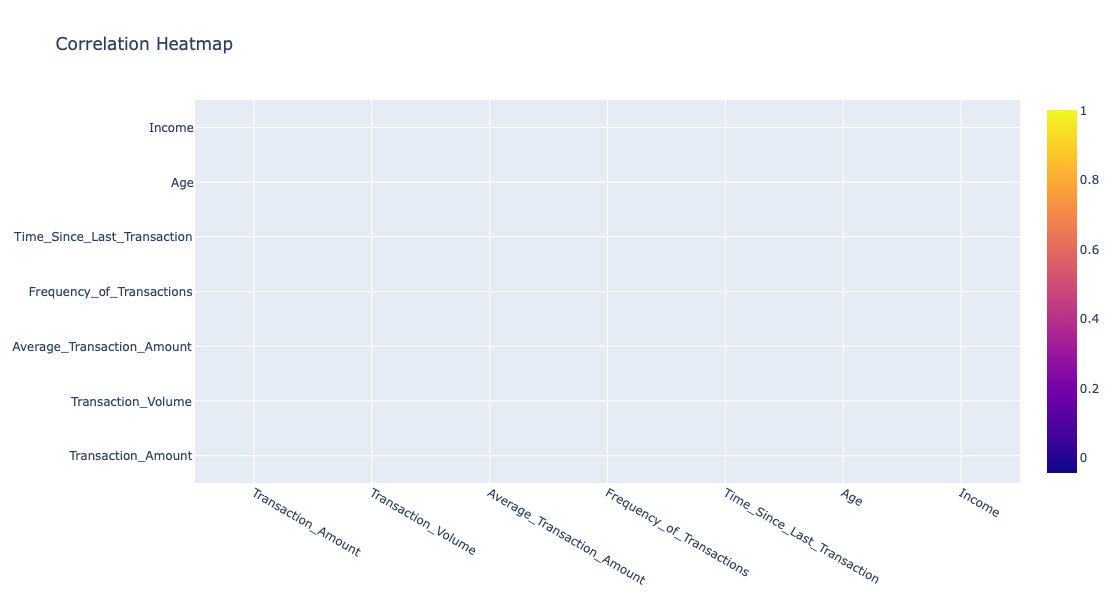

In [10]:
# Heatmap of features
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
fig_corr_heatmap = go.Figure(data = go.Heatmap(z = correlation_matrix.values, x = correlation_matrix.columns, y = correlation_matrix.index))
fig_corr_heatmap.update_layout(title = 'Correlation Heatmap', height = 600)
fig_corr_heatmap.show()

![VISUALIZATION5](Visualizations/viz5.png)

### Statistical Method: Z-Score

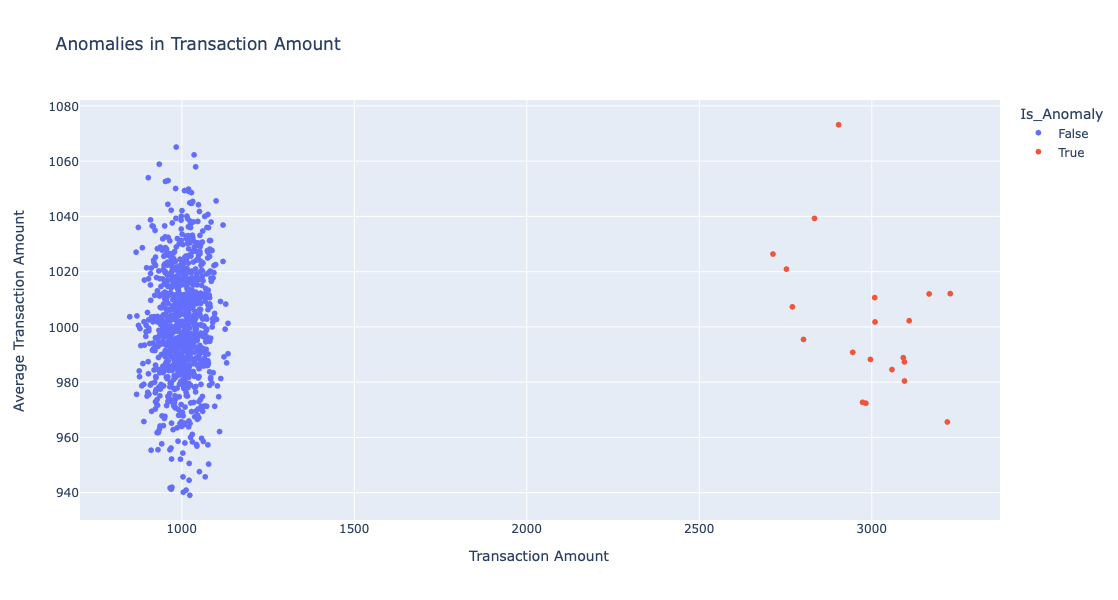

In [11]:
# Calculate mean and standard deviation of Transaction Amount
mean_amount = data['Transaction_Amount'].mean()
std_amount = data['Transaction_Amount'].std()

# Define the anomaly threshold (2 standard deviations from the mean)
anomaly_threshold = mean_amount + 2 * std_amount

# Flag anomalies
data['Is_Anomaly'] = data['Transaction_Amount'] > anomaly_threshold

# Scatter plot of Transaction Amount with anomalies highlighted
anomalies = px.scatter(data, x = 'Transaction_Amount', y = 'Average_Transaction_Amount',color = 'Is_Anomaly', 
                           title = 'Anomalies in Transaction Amount')
anomalies.update_traces(marker = dict(size = 12), selector = dict(mode = 'markers', marker_size = 1))
anomalies.update_layout(height = 600, xaxis_title = 'Transaction Amount', yaxis_title = 'Average Transaction Amount')
anomalies.show()

![VISUALIZATION6](Visualizations/viz6.png)

### Applying Various Machine Learning Models
### Machine Learning Model 1: Isolation Forest

In [12]:
# Calculate the number of anomalies
num_anomalies = data['Is_Anomaly'].sum()

# Calculate the total number of instances in the dataset
total_instances = data.shape[0]

# Calculate the ratio of anomalies
anomaly_ratio = num_anomalies / total_instances
print(anomaly_ratio)

0.02


In [13]:
# Isolation forest
relevant_features = ['Transaction_Amount', 'Average_Transaction_Amount', 'Frequency_of_Transactions']

# Split data into features (X) and target variable (y)
X = data[relevant_features]
y = data['Is_Anomaly']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train the Isolation Forest model
model = IsolationForest(contamination = 0.02, random_state = 42)
model.fit(X_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.02, random_state=42)

In [14]:
# Predict anomalies on the test set
y_pred = model.predict(X_test)

# Convert predictions to binary values (0: normal, 1: anomaly)
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]

# Evaluate the model's performance
report = classification_report(y_test, y_pred_binary, target_names=['Normal', 'Anomaly'])
print(report)

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       196
     Anomaly       1.00      1.00      1.00         4

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [15]:
# Relevant features used during training
relevant_features = ['Transaction_Amount', 'Average_Transaction_Amount', 'Frequency_of_Transactions']

# Get user inputs for features
user_inputs = []
for feature in relevant_features:
    user_input = float(input(f"Enter the value for '{feature}': "))
    user_inputs.append(user_input)

# Create a DataFrame from user inputs
user_df = pd.DataFrame([user_inputs], columns=relevant_features)

# Predict anomalies using the model
user_anomaly_pred = model.predict(user_df)

# Convert the prediction to binary value (0: normal, 1: anomaly)
user_anomaly_pred_binary = 1 if user_anomaly_pred == -1 else 0

if user_anomaly_pred_binary == 1:
    print("Anomaly detected: This transaction is flagged as an anomaly.")
else:
    print("No anomaly detected: This transaction is normal.")

Enter the value for 'Transaction_Amount':  20000
Enter the value for 'Average_Transaction_Amount':  2000
Enter the value for 'Frequency_of_Transactions':  12


Anomaly detected: This transaction is flagged as an anomaly.


### Machine Learning Model 2: Random Forest

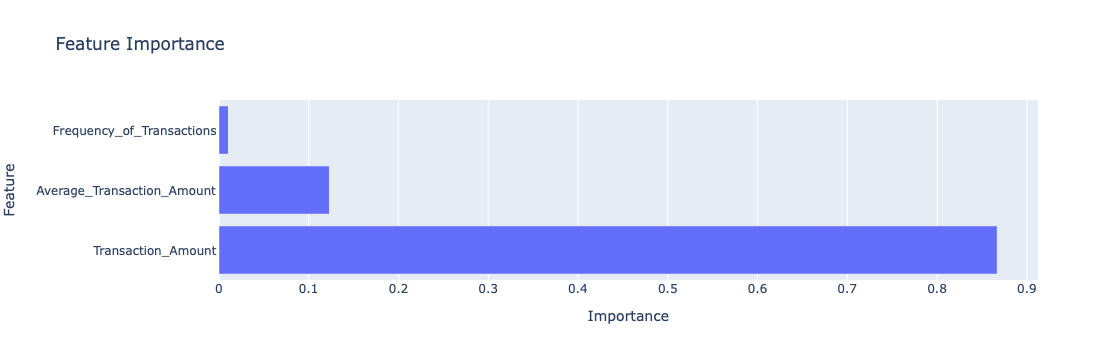

In [16]:
# Assuming 'X' is your feature matrix and 'y' is your target
model = RandomForestClassifier()
model.fit(X_train, y_train)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by = 'Importance', ascending=False)
fig = px.bar(feature_importance, x = 'Importance', y = 'Feature', title = 'Feature Importance')
fig.show()

![VISUALIZATION7](Visualizations/viz7.png)

### Machine Learning Model 3: ROC Model

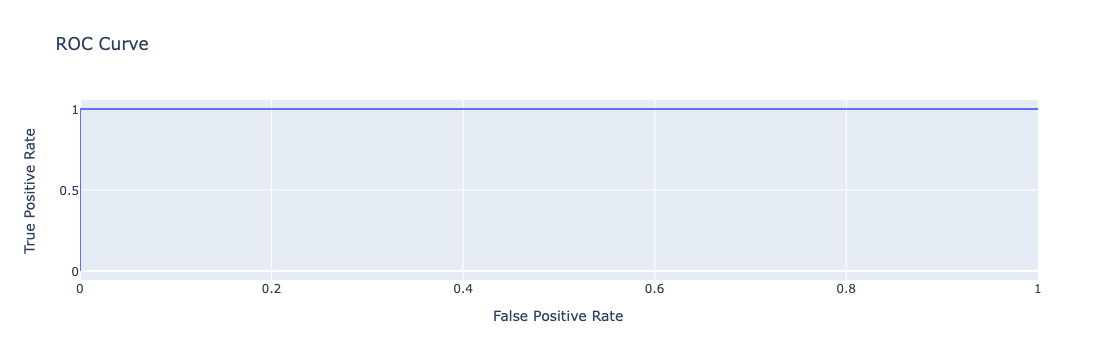

In [17]:
# ROC model
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

fig = go.Figure()
fig.add_trace(go.Scatter(x = fpr, y = tpr, mode = 'lines', name = f'AUC = {auc:.2f}'))
fig.update_layout(title = 'ROC Curve', xaxis_title = 'False Positive Rate', yaxis_title = 'True Positive Rate')
fig.show()

![VISUALIZATION8](Visualizations/viz8.png)

### Machine Learning Model 4: Autoencoder

In [18]:
# Autoencoder 
numeric_data = data.select_dtypes(include=['number'])

scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(numeric_data_scaled, test_size=0.2, random_state=42)

# Build the autoencoder model
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoder = Dense(14, activation = "relu")(input_layer)
encoder = Dense(7, activation = "relu")(encoder)
decoder = Dense(14, activation = "relu")(encoder)
decoder = Dense(input_dim, activation = "sigmoid")(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs = 50, batch_size = 32, validation_data = (X_test, X_test), verbose = 1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2399 - val_loss: 1.1872
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 1.1718 - val_loss: 1.1411
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 1.1719 - val_loss: 1.0918
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 1.0774 - val_loss: 1.0411
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 1.0819 - val_loss: 0.9913
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 1.0349 - val_loss: 0.9492
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 0.9855 - val_loss: 0.9154
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 0.9632 - val_loss: 0.8892
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.8825 - val_loss: 0.8698
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - loss: 0.9383 - val_loss: 0.8540
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.8538 - val_loss: 0.8416
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step -

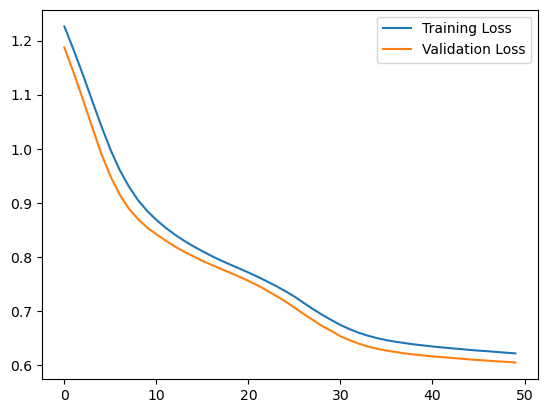

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


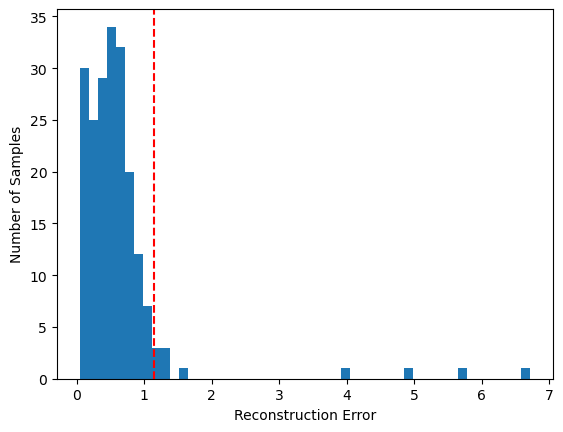

Number of anomalies detected: 10


In [19]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Predict the reconstruction on the test data
X_test_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - X_test_pred, 2), axis = 1)

# Calculate the reconstruction error threshold
threshold = np.percentile(mse, 95)

# Identify anomalies
anomalies = mse > threshold

# Plot the reconstruction error
plt.hist(mse, bins = 50)
plt.axvline(threshold, color = 'r', linestyle = '--')
plt.xlabel('Reconstruction Error')
plt.ylabel('Number of Samples')
plt.show()

# Print number of anomalies detected
print(f'Number of anomalies detected: {np.sum(anomalies)}')

### Identifying which model is best (Isolation Forest or Autoencoder)

In [20]:
# Isolation Forest evaluation
roc_score_if = roc_auc_score(y_test, y_pred_binary)
precision_if, recall_if, _ = precision_recall_curve(y_test, y_pred_binary)

print(f"Isolation Forest ROC-AUC: {roc_score_if}")

# Autoencoder evaluation (requires reconstruction error calculation)
reconstruction_error = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstruction_error, 2), axis=1)
threshold = np.percentile(mse, 95)
y_pred_autoencoder = mse > threshold

roc_score_ae = roc_auc_score(y_test, y_pred_autoencoder)
precision_ae, recall_ae, _ = precision_recall_curve(y_test, y_pred_autoencoder)

print(f"Autoencoder ROC-AUC: {roc_score_ae}")

Isolation Forest ROC-AUC: 1.0
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
Autoencoder ROC-AUC: 0.9846938775510203
